# Data Mining Week 5 Class Practice
# Rayna Shera Chang / 0706022310022
#

In [ ]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [ ]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"
df = pd.read_csv(url)
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [ ]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [ ]:
# get statistical info from dataset
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


# Data Preprocessing

In [ ]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'Employee_ID':
[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  

In [ ]:
# Drop Employee_ID as it's only an identifier.
df = df.drop(columns=['Employee_ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Years_Since_Last_Promotion     1000 non-null   int64 
 11  Work_Life_Balance              1000 non-null   int64 
 12  Job_Satisfaction               1000 non-null   int64 
 13  Perf

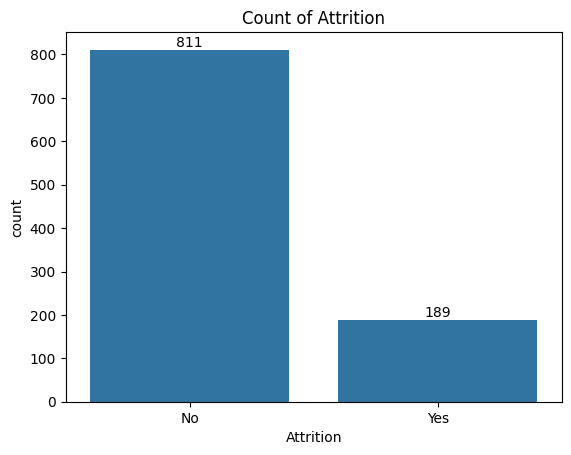

In [ ]:
# show how many attrition
ax = sns.countplot(data=df, x='Attrition')
plt.title('Count of Attrition')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Feature Encoding

In [ ]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, Overtime

one_hot_map = {
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1},
    'Attrition': {'No': 0, 'Yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Department', 'Job_Role', 'Marital_Status']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Job_Role': {'Analyst': 0, 'Assistant': 1, 'Executive': 2, 'Manager': 3},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
117,58,0,2.0,0.0,1.0,2,13291,50,7,2,2,4,2,4,80,0,7,59,5,1,3,4,43,4,0
533,48,1,1.0,2.0,1.0,3,14362,26,20,6,8,1,3,3,54,1,5,47,9,4,3,3,38,1,0
971,46,0,1.0,1.0,0.0,2,19661,16,8,13,6,1,4,4,65,0,7,35,0,1,2,1,18,4,0
491,38,1,0.0,3.0,2.0,1,12873,53,29,1,7,4,3,4,89,0,7,49,0,1,1,4,11,1,0
767,45,1,0.0,2.0,1.0,4,18124,99,12,7,2,4,4,3,56,0,1,51,17,4,4,4,10,1,1


In [ ]:
# checking encode result
df.loc[117]

,117
Age,58
Gender,Female
Marital_Status,Single
Department,Finance
Job_Role,Assistant
Job_Level,2
Monthly_Income,13291
Hourly_Rate,50
Years_at_Company,7
Years_in_Current_Role,2


# Separate features and target

In [ ]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [ ]:
X.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
0,58,0,1.0,2.0,3.0,1,15488,28,15,4,2,1,3,4,14,0,6,54,17,4,4,4,20,3
1,48,0,1.0,4.0,1.0,5,13079,28,6,9,1,2,1,1,6,1,2,45,1,4,1,2,25,2
2,34,1,1.0,3.0,1.0,1,13744,24,24,14,8,3,2,1,77,1,6,34,2,3,4,4,45,3
3,27,0,0.0,3.0,3.0,1,6809,26,10,8,2,3,5,4,49,0,9,48,18,2,3,1,35,3
4,40,1,0.0,3.0,2.0,1,10206,52,29,10,1,2,5,1,64,0,3,33,0,4,1,3,44,3


In [ ]:
y.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((700, 24), (300, 24))

In [ ]:
X_train.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
105,41,0,1.0,3.0,1.0,2,6144,65,21,9,7,2,3,2,14,0,8,40,13,1,1,4,34,2
68,59,0,2.0,4.0,2.0,3,3935,24,7,7,2,2,2,1,39,0,7,55,12,3,2,4,19,2
479,56,0,1.0,4.0,3.0,1,15478,99,17,8,8,4,3,2,35,0,3,43,6,2,4,4,5,2
399,49,1,1.0,1.0,3.0,4,9040,35,29,10,7,1,4,1,16,1,9,51,17,4,3,4,45,1
434,52,0,2.0,3.0,0.0,1,11219,96,21,5,0,3,5,1,57,0,3,51,10,2,4,3,45,3


In [ ]:
X_test.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
993,24,1,0.0,0.0,3.0,2,16465,32,10,10,2,4,2,4,6,1,7,51,18,2,2,3,8,4
859,25,0,0.0,1.0,0.0,5,18871,51,16,10,8,4,1,1,4,0,3,44,4,1,4,4,19,3
298,43,1,1.0,0.0,2.0,4,11226,81,26,1,2,2,4,4,34,1,6,47,7,2,3,2,32,1
553,58,0,0.0,4.0,1.0,3,18859,58,8,1,3,1,3,4,89,0,8,46,3,2,2,3,17,3
672,31,0,2.0,4.0,3.0,3,10509,19,23,1,4,3,1,3,79,0,7,48,7,4,1,4,36,1


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       134

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       245
           1       0.17      0.25      0.21        55

    accuracy                           0.64       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.70      0.64      0.66       300



# Hyperparameter Tuning using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                          n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'random_state': 42}
Best cross-validation f1 score: 0.223


In [ ]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       566
           1       0.92      0.52      0.67       134

    accuracy                           0.90       700
   macro avg       0.91      0.76      0.80       700
weighted avg       0.90      0.90      0.89       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       245
           1       0.12      0.09      0.11        55

    accuracy                           0.72       300
   macro avg       0.47      0.47      0.47       300
weighted avg       0.68      0.72      0.70       300



# KFold Cross Validation

In [ ]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 857, Test set:143
Fold:2, Train set: 857, Test set:143
Fold:3, Train set: 857, Test set:143
Fold:4, Train set: 857, Test set:143
Fold:5, Train set: 857, Test set:143
Fold:6, Train set: 857, Test set:143
Fold:7, Train set: 858, Test set:142


In [ ]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.07843137 0.18867925 0.21428571 0.13559322 0.25714286 0.18518519
 0.14035088]
Average score: 0.17


In [ ]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'random_state': 42}
Best cross-validation f1 score: 0.223


# Oversampling using SMOTENC

In [ ]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'Gender',
    'Marital_Status',
    'Department',
    'Job_Role',
    'Job_Level',
    'Job_Satisfaction',
    'Performance_Rating',
    'Overtime',
    'Work_Environment_Satisfaction',
    'Relationship_with_Manager',
    'Job_Involvement'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 24), (487, 24))

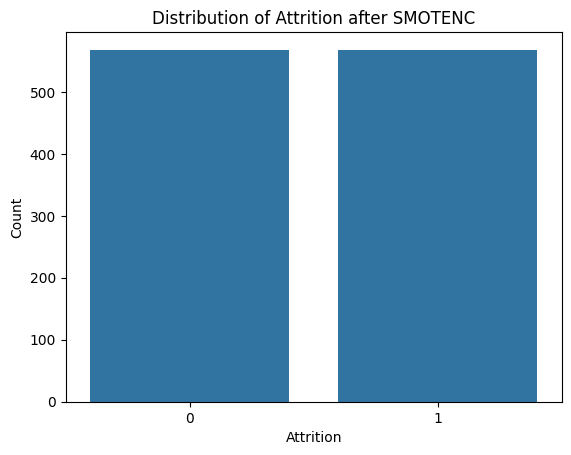

In [ ]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Years_Since_Last_Promotion     1000 non-null   int64 
 11  Work_Life_Balance              1000 non-null   int64 
 12  Job_Satisfaction               1000 non-null   int64 
 13  Perf

In [ ]:
# BUILD CLASSIFICATION MODEL but with no parameters
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.71      0.63      0.66       244
           1       0.66      0.74      0.70       243

    accuracy                           0.68       487
   macro avg       0.68      0.68      0.68       487
weighted avg       0.68      0.68      0.68       487



# Feature Importance

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.04258351 0.02003036 0.02432154 0.0073841  0.01168722 0.03665738
 0.11091583 0.09431729 0.07163533 0.05121106 0.04392402 0.01843173
 0.03280079 0.01535558 0.0461396  0.01080764 0.05832449 0.0758262
 0.03642063 0.01478042 0.00690295 0.03885318 0.07045998 0.06022914]


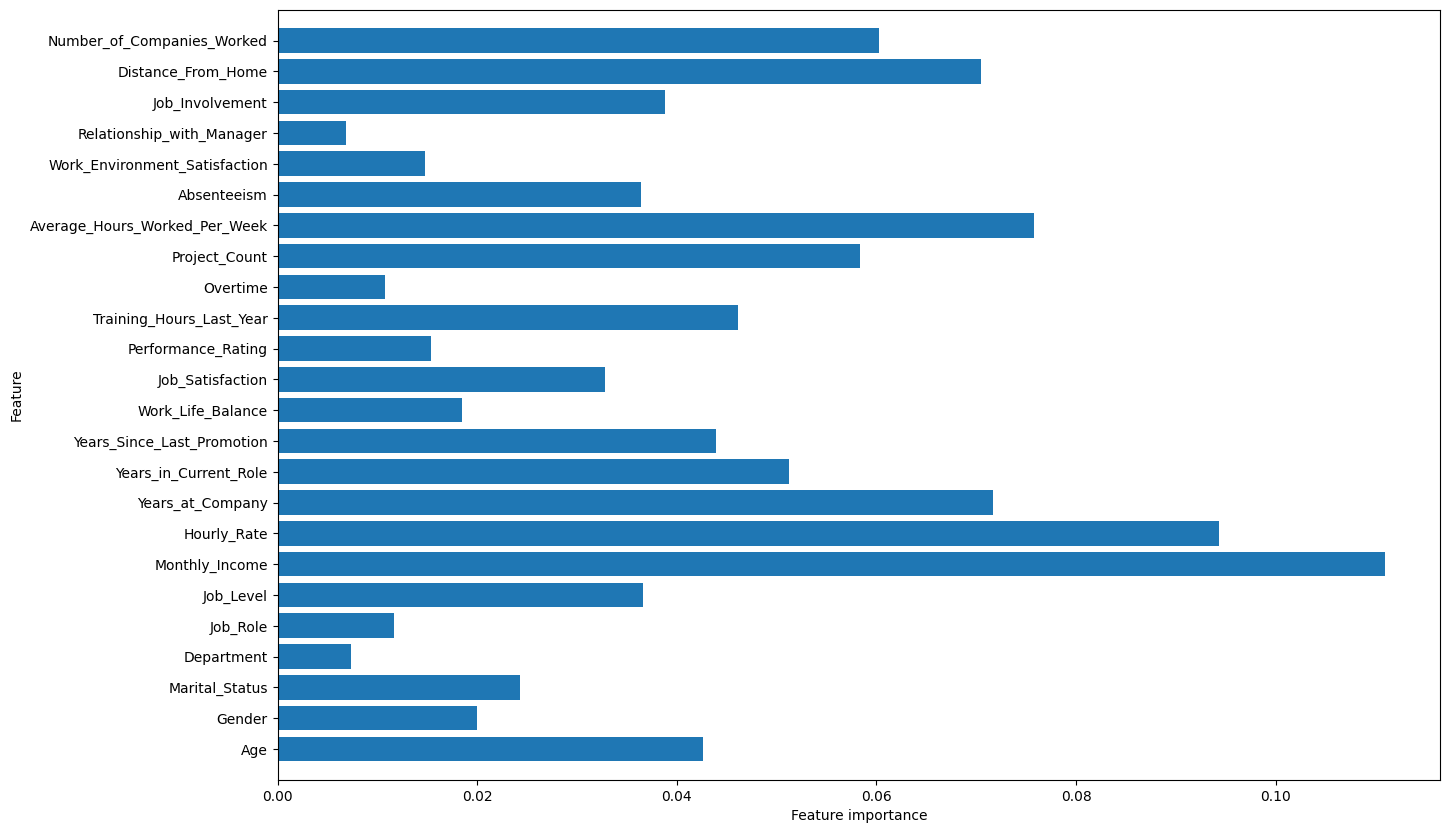

In [ ]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [ ]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
Monthly_Income,0.110916
Hourly_Rate,0.094317
Average_Hours_Worked_Per_Week,0.075826
Years_at_Company,0.071635
Distance_From_Home,0.070460
Number_of_Companies_Worked,0.060229
Project_Count,0.058324
Years_in_Current_Role,0.051211


In [ ]:
# using only important features for the prediction
important_features = ["Monthly_Income", "Hourly_Rate", "Average_Hours_Worked_Per_Week",
    "Years_at_Company", "Distance_From_Home","Number_of_Companies_Worked","Project_Count","Years_in_Current_Role"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['Attrition'] #target

In [ ]:
display(X_importance)
display(y_importance)

,Monthly_Income,Hourly_Rate,Average_Hours_Worked_Per_Week,Years_at_Company,Distance_From_Home,Number_of_Companies_Worked,Project_Count,Years_in_Current_Role
0,15488,28,54,15,20,3,6,4
1,13079,28,45,6,25,2,2,9
2,13744,24,34,24,45,3,6,14
3,6809,26,48,10,35,3,9,8
4,10206,52,33,29,44,3,3,10
...,...,...,...,...,...,...,...,...
995,4172,76,46,24,24,4,4,14
996,11007,71,36,19,39,3,7,6
997,4641,43,46,25,33,2,1,12
998,19855,92,52,13,41,4,4,13


,Attrition
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


In [ ]:
from imblearn.over_sampling import SMOTE
# oversampling againnn
smote = SMOTE(random_state=42)
X_importance, y_importance = smote.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 8), (487, 8))

In [ ]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       579

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       255
           1       0.72      0.77      0.74       232

    accuracy                           0.75       487
   macro avg       0.75      0.75      0.75       487
weighted avg       0.75      0.75      0.75       487



# Selecting Predictors/Features Based on Correlation

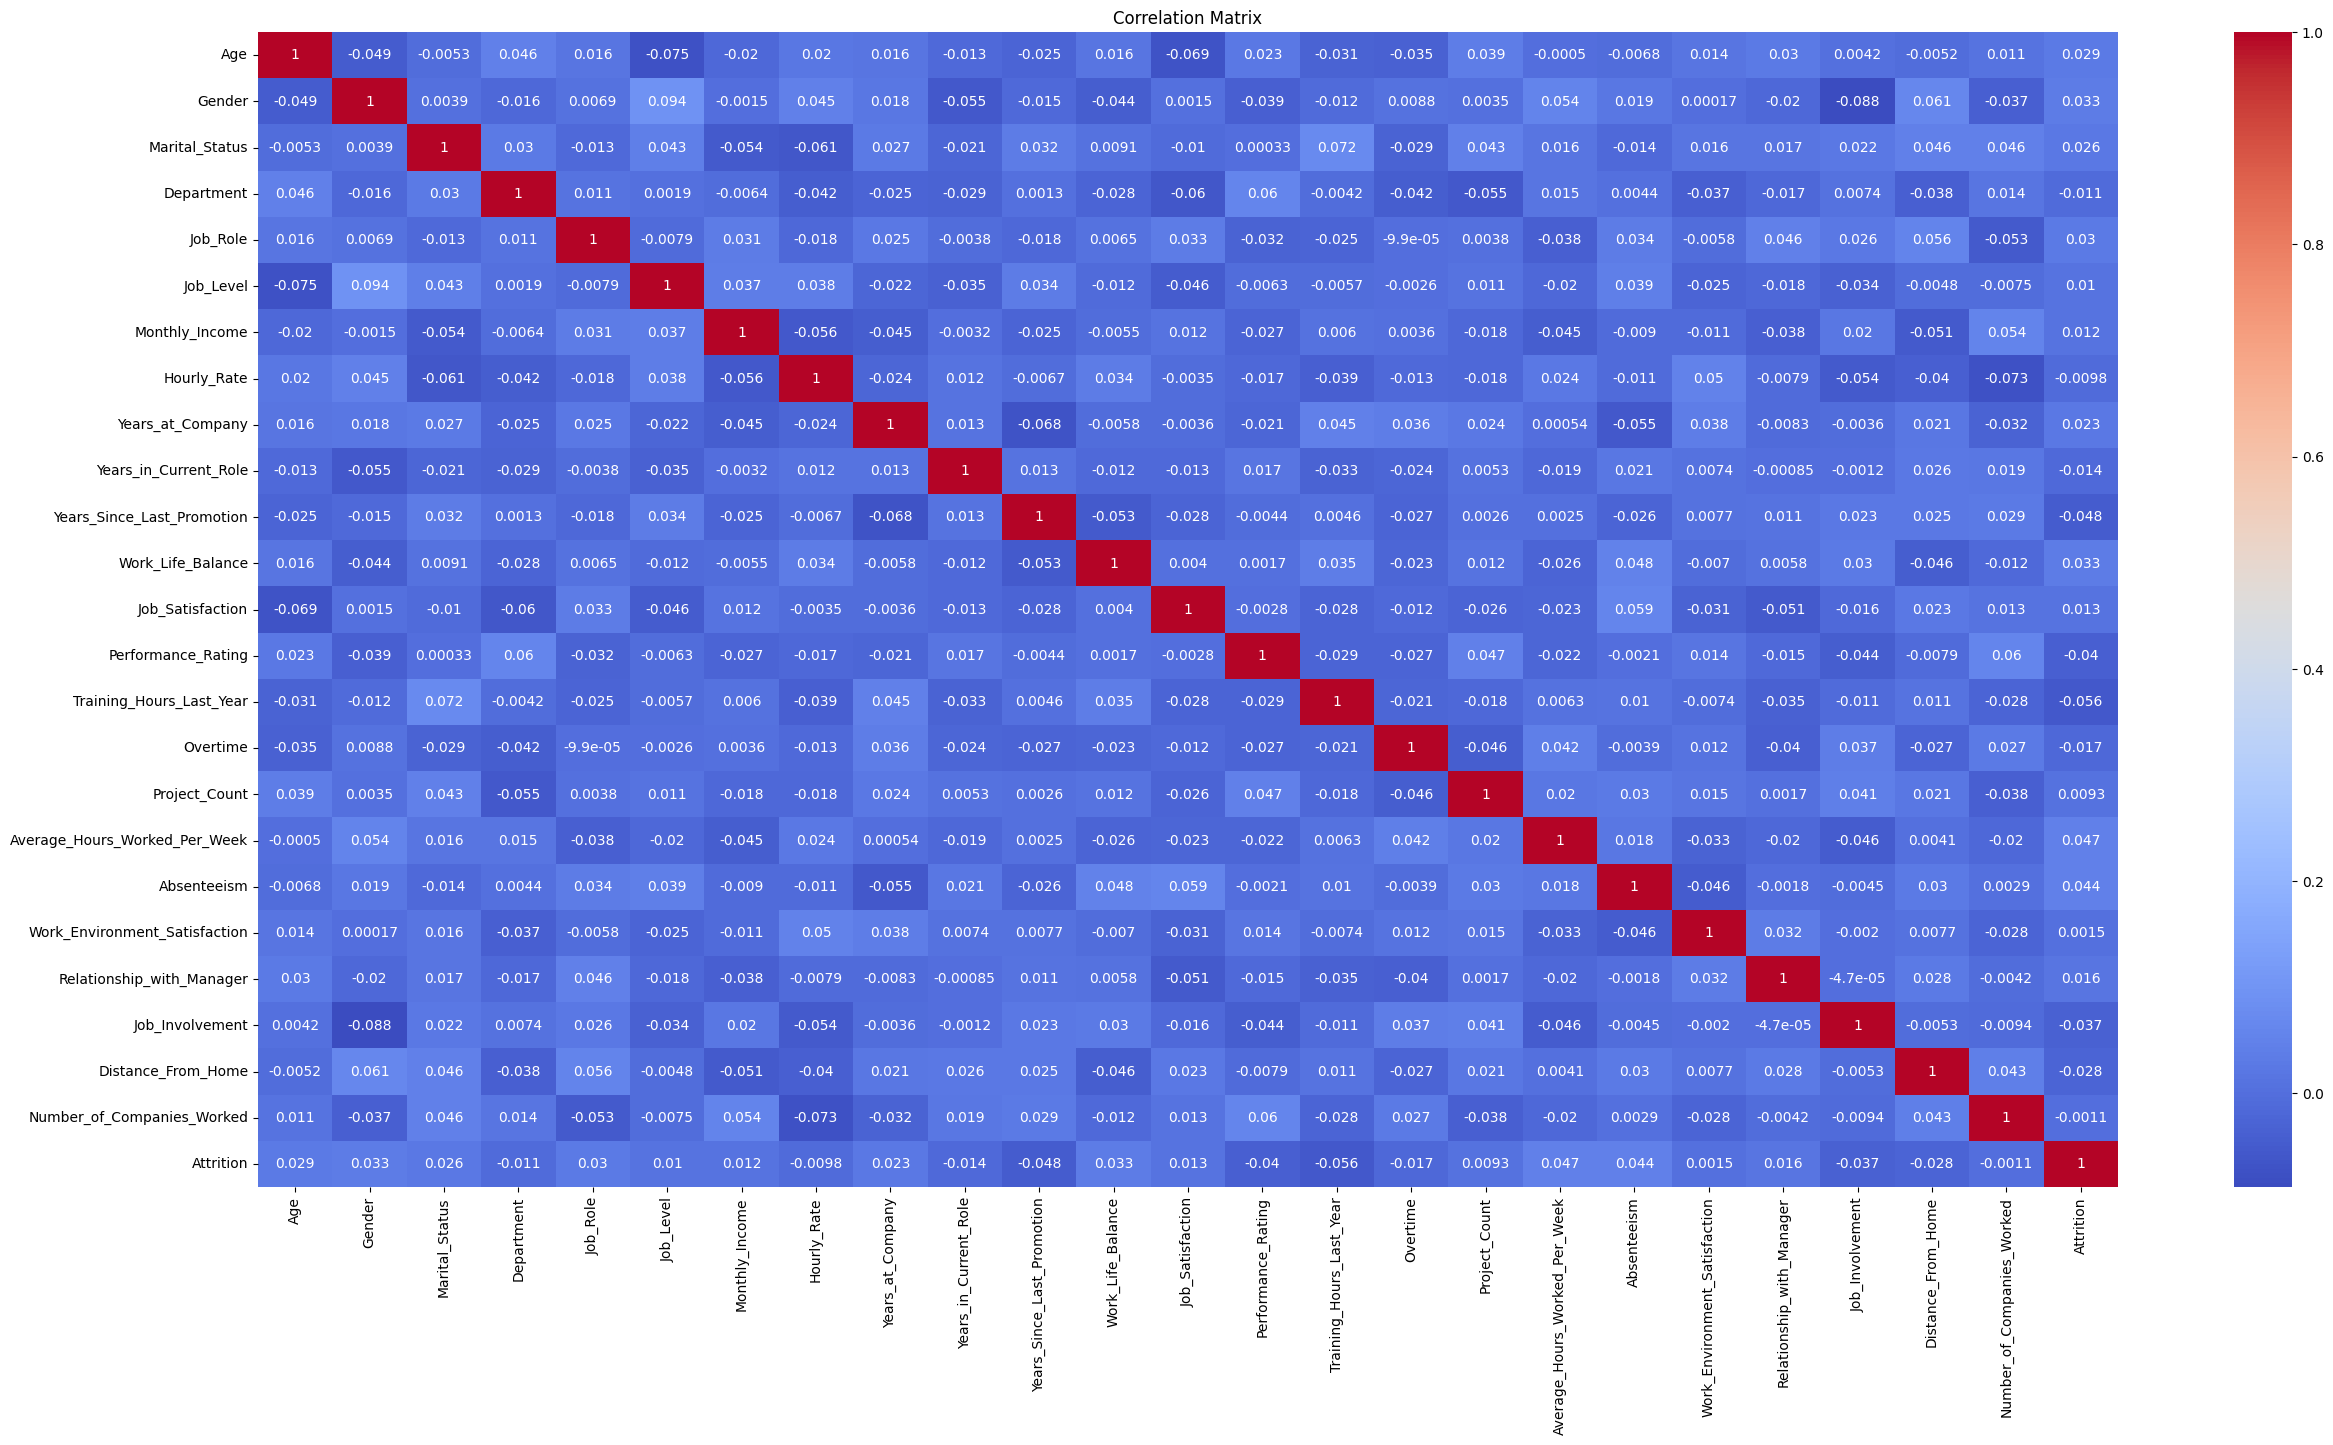

In [ ]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
heatmap_features = ['Overtime', 'Job_Satisfaction', 'Years_at_Company', 'Distance_From_Home', 'Monthly_Income', 'Job_Involvement']
X_heatmap = df_encoded[heatmap_features] #input
y_heatmap = df_encoded['Attrition'] #target

In [ ]:
categorical_features = ['Overtime', 'Job_Satisfaction', 'Job_Involvement']

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_heatmap, y_heatmap = smotenc.fit_resample(X_heatmap, y_heatmap)

X_train, X_test, y_train, y_test = train_test_split(X_heatmap, y_heatmap, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 6), (487, 6))

In [ ]:
# i build a model based on best feature by correlation
heatmap_tree = DecisionTreeClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.64      0.59      0.62       244
           1       0.62      0.67      0.64       243

    accuracy                           0.63       487
   macro avg       0.63      0.63      0.63       487
weighted avg       0.63      0.63      0.63       487



# Model Evaluation

**1. Model Performance**

After testing several model combination performances, the best-performing setup was obtained by selecting attributes using Feature Importance and then applying SMOTE for oversampling.

Classification Report (Training Set)

| Metric    | Score    |
| --------- | -------- |
| Accuracy  | *1.00* |
| Precision | *1.00* |
| Recall    | *1.00* |
| F1-score  | *1.00* |


Classification Report (Test Set)
| Metric    | Score                                   |
| --------- | --------------------------------------- |
| Accuracy  | *0.75*                                |
| Precision | *0.78 (class 0)* / *0.72 (class 1)* |
| Recall    | *0.72 (class 0)* / *0.77 (class 1)* |
| F1-score  | *0.75 (class 0)* / *0.74 (class 1)* |

This approach produced the highest and most balanced results on both training and test data. The model achieved a training accuracy of 1.00 and a test accuracy of 0.75, with precision, recall, and F1-score all around 0.74–0.75.

Compared to other methods (such as feature selection based on correlation), this combination significantly improved the model’s ability to predict both classes correctly. Feature importance helped the model focus only on the most relevant predictors, reducing noise. SMOTE balanced the dataset by generating synthetic examples for the minority class, preventing bias toward the majority class.

**2. Compare baseline vs tuned model performance**

1. Before Model Development (Baseline Model)

| Metric                 | Baseline                      | Tuned Model                   | Observation                                  |
| ---------------------- | ----------------------------- | ----------------------------- | -------------------------------------------- |
| *Accuracy*           | 1.00                          | 1.00                          | Both models perfectly fit the training data. |
| *F1-score (class 0)* | 1.00                          | 1.00                          | There’s no difference, both models accurately predict class 0. |
| *F1-score (class 1)* | 1.00                          | 1.00                          | No change, both show potential overfitting. |
| *Overall*            | Perfect (possibly overfitted) | Perfect (possibly overfitted) | There’s no significant difference in training performance.           |

In the baseline model, all features were used without any selection or resampling. As a result, the dataset remained highly imbalanced, with far fewer samples in the “Yes” (Attrition) class compared to the “No” class.
Because of this imbalance, the Decision Tree became biased toward predicting the majority class. This led to very low Precision (0.17) and Recall (0.25) for the minority class, indicating that the model failed to correctly identify employees who were likely to leave.
Furthermore, the training accuracy reached 100%, while the test accuracy dropped to 64%, showing clear overfitting, the model memorized training data instead of learning generalizable patterns.

2. After Tuning and Applying SMOTE

| Metric                  | Baseline | Tuned Model | Observation                                                     |
| ----------------------- | -------- | ----------- | --------------------------------------------------------------- |
| *Accuracy*            | 0.64     | 0.75        | The tuned model performs 0.11 points better, showing stronger generalization ability.
| *F1-score (class 0)*  | 0.77     | 0.75        | It dropped a little, yet the results are now more evenly distributed.
| *F1-score (class 1)*  | 0.21     | 0.74        | Huge improvement, tuned model now handles minority class well. |
| *Precision (class 1)* | 0.17     | 0.72        | Significant rise, resulting in fewer incorrect positive predictions.
| *Recall (class 1)*    | 0.25     | 0.77        | Large improvement, the model now identifies more class 1 cases correctly.
| *Macro avg F1*        | 0.49     | 0.75        | An increase of 0.26, indicating more balanced performance among all classes.
| *Weighted avg F1*     | 0.66     | 0.75        | +0.09 overall improvement.                                      |

After improvement, two major techniques were applied:

*   Feature Selection using Feature Importance – Only the most significant variables related to employee behavior and satisfaction were retained. This removed irrelevant or redundant attributes, helping the model focus on impactful patterns.
*   Oversampling using SMOTE – Synthetic samples were generated for the minority class, balancing the dataset and giving the model equal exposure to both “stay” and “leave” cases.

With these steps, the tuned Decision Tree achieved a Test Accuracy of 0.75 and an F1-score of 0.74, showing much better generalization and balance between Precision and Recall. The model now successfully identifies employees at risk of attrition while maintaining accuracy across both classes.

# Discussion and Insights

The preprocessing steps played a critical role in improving the model’s performance and ensuring that the Decision Tree classifier could learn meaningful patterns rather than noise.

**1. Dropping Irrelevant or Identifier Columns**

The column Employee_ID was removed because it serves only as a unique identifier and does not contain predictive information related to employee attrition. Including such columns can mislead the model into memorizing individual records instead of learning relationships among meaningful variables. Dropping it ensured that the model relied solely on behavioral and demographic features that genuinely influence attrition.

**2. Feature Encoding**

The dataset contained a mix of categorical and numerical attributes, which required conversion into numerical form for machine learning algorithms to process them. Encoding standardized the input data and allowed the Decision Tree to consider both categorical and continuous features fairly, improving interpretability and computational efficiency.

*   Binary Mapping (One-Hot Encoding style):
Columns such as Gender, Overtime, and Attrition were encoded as 0 or 1.
This transformation allowed the model to interpret binary relationships effectively. For example, identifying how working overtime or gender differences impact attrition probability.
*   Ordinal Encoding for Nominal Variables:
Non-ordered categorical features like Department, Job_Role, and Marital_Status were encoded using OrdinalEncoder.
Although these categories do not have a natural order, encoding them numerically was necessary for the algorithm to process them. The mapping dictionary ensured that the transformation was transparent and reproducible.
By transforming categorical attributes into numeric form, the model could compute splits based on these variables, enabling it to recognize patterns such as which departments or job roles have higher attrition rates.

**3. Handling Class Imbalance with SMOTENC**

The original dataset was imbalanced, with far fewer employees who left (Attrition = 1) compared to those who stayed (Attrition = 0).
To correct this imbalance, SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous data) was applied. This method creates synthetic samples for the minority class by interpolating between nearby minority instances while respecting categorical boundaries.

Defining categorical columns explicitly in SMOTENC ensured that the algorithm handled mixed data types accurately, categorical values were not averaged but resampled appropriately.
This step resulted in a balanced dataset, enabling the Decision Tree to learn patterns from both “staying” and “leaving” employees equally.

As a result, the model’s ability to detect the minority class improved significantly:
*   The Recall for attrition (class 1) increased substantially, showing the model could correctly identify more true positives.
*   The F1-Score also improved to 0.74, indicating a strong balance between precision and recall.

**4. Overall Impact on Model Performance**

Through these preprocessing steps, the model evolved from being biased and overfitted (with low generalization ability) to being balanced, interpretable, and more accurate.
Encoding allowed the model to process complex categorical information effectively, while SMOTENC ensured that the model learned from a balanced dataset. Together, they contributed to a notable improvement in prediction quality, with both classes now being recognized accurately and consistently.